In [1]:
import h5py
import cv2
import warp_norm
import matplotlib
import sys
sys.path.append("./FaceAlignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

## webcam_c
fileroot = '/home/hgh/hghData/gaze/eve/valpart/val01/step030_video_Wikimedia-Joy-and-Heron-Animated-CGI-Spot-by-Passion-Pictures/webcam_c.h5'

file = h5py.File(fileroot, 'r')
file.keys()

<KeysViewHDF5 ['camera_matrix', 'camera_transformation', 'face_PoG_tobii', 'face_R', 'face_W', 'face_g_tobii', 'face_h', 'face_o', 'facial_landmarks', 'head_rvec', 'head_tvec', 'inv_camera_transformation', 'left_PoG_tobii', 'left_R', 'left_W', 'left_g_tobii', 'left_h', 'left_o', 'left_p', 'millimeters_per_pixel', 'pixels_per_millimeter', 'right_PoG_tobii', 'right_R', 'right_W', 'right_g_tobii', 'right_h', 'right_o', 'right_p']>

In [2]:
camera_matrix = file['camera_matrix'][:]
print('camera_matrix:')
print(camera_matrix)


camera_transformation = file['camera_transformation'][:]
print('camera_transformation:')
print(camera_transformation)


head_rvec = file['head_rvec']['data']
print('head_rvec:')
print(head_rvec)


head_tvec = file['head_tvec']['data']
print('head_tvec:')
print(head_tvec)


tobii = file['face_PoG_tobii']['data']
print('gaze[0]:')
print(tobii[0])

gaze_o = file['face_o']['data']
print('gaze_o[0]:')
print(gaze_o[0])

gazen = file['face_g_tobii']['data']
print('gazen[0]:')
print(gazen[0])

facial_landmarks = file['facial_landmarks']['data']
print('facial_landmarks:')
print(facial_landmarks)

pixel_scale = file['millimeters_per_pixel'][:]
print(pixel_scale)

camera_matrix:
[[1.4348026e+03 0.0000000e+00 8.9519110e+02]
 [0.0000000e+00 1.4300173e+03 5.2023175e+02]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]
camera_transformation:
[[-9.9999911e-01  4.3172998e-04  1.2619183e-03  2.8123349e+02]
 [ 8.0088421e-04  9.5096058e-01  3.0931106e-01  4.9301586e+01]
 [-1.0664958e-03  3.0931178e-01 -9.5096010e-01  4.1024928e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]
head_rvec:
<HDF5 dataset "data": shape (1800, 3, 1), type "<f4">
head_tvec:
<HDF5 dataset "data": shape (1800, 3, 1), type "<f4">
gaze[0]:
[958.9517  555.60803]
gaze_o[0]:
[ 14.94074   14.511084 619.6507  ]
gazen[0]:
[-0.34259087 -0.00121984]
facial_landmarks:
<HDF5 dataset "data": shape (1800, 68, 2), type "<f4">
[0.28802082 0.28796297]


# 计算标定点和ground truth标定点的偏差

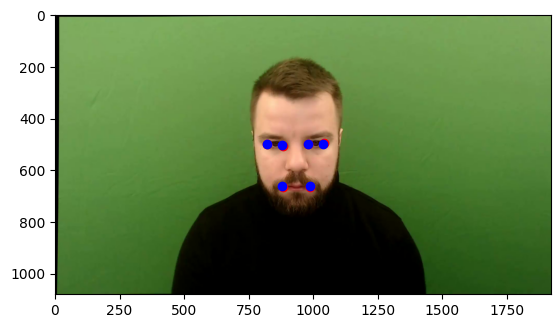

[[ 820.       496.     ]
 [ 878.       502.     ]
 [ 980.       496.     ]
 [1038.       489.13943]
 [ 871.1394   662.     ]
 [ 986.       662.     ]]
[[ 823.  499.]
 [ 882.  499.]
 [ 980.  499.]
 [1039.  493.]
 [ 882.  663.]
 [ 994.  663.]]


In [3]:
import sys
sys.path.append("./FaceAlignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# 预测的2D人脸标定点,使用xgaze方式（红）
# load face model
video_path = fileroot[:-3] + '.mp4'
cap = cv2.VideoCapture(video_path)
idx = 0
face_xgaze = []
while idx != 10:
    ret,frame = cap.read()
    # cv2.imshow('Frames', frame)
    
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False)
    preds = fa.get_landmarks(frame)
    landmark_use = [36,39,42,45,48,54]
    lm = preds[0]
    lm = lm[landmark_use, :]
    face_xgaze.append(lm)
    idx += 1
face_xgaze = np.array(face_xgaze)
cap = cv2.VideoCapture(video_path)
ret,frame = cap.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.scatter(face_xgaze[0,:,0],face_xgaze[0,:,1],c='r')

# eve提供的参考2D人脸中心(蓝)
landmark_use = [36,39,42,45,48,54]
face_eve = facial_landmarks[0:10,landmark_use, :]
plt.scatter(face_eve[0,:,0],face_eve[0,:,1],c='b')
# 显示第一张图片
plt.show() 

print(face_eve[1])
print(face_xgaze[1])

In [4]:
# print(hr_xgaze.shape, hr.shape)

for htg, htgt in zip(face_eve[0], face_xgaze[0]):
    print(htg,htgt)

[820. 496.] [822. 498.]
[878. 502.] [881. 505.]
[980. 496.] [980. 498.]
[1038.  496.] [1040.  492.]
[878. 662.] [881. 663.]
[986. 662.] [987. 663.]


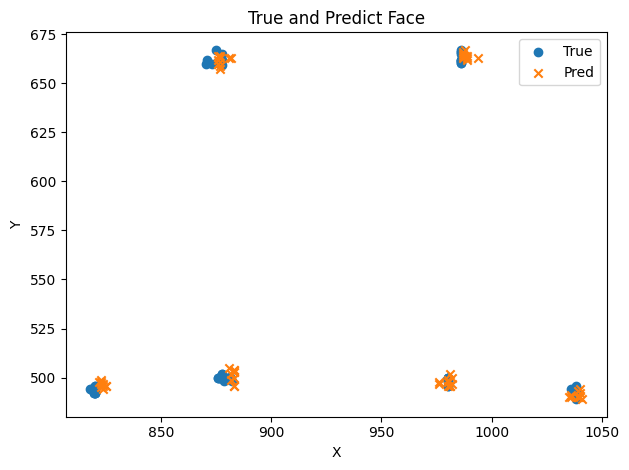

In [5]:
import sys
sys.path.append("./FaceAlignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt


# 计算每组数据的均方根误差（RMSE）
rmse_values = [np.sqrt(np.mean((true - measured)**2)) for true, measured in zip(face_eve, face_xgaze)]

# 可视化
# plt.figure(figsize=(10, 12))

# plt.subplot(2, 1, 1)

plt.scatter(face_eve[:,:, 0], face_eve[:,:, 1], marker='o', label=f'True')
plt.scatter(face_xgaze[:,:, 0], face_xgaze[:,:, 1], marker='x', label=f'Pred')

plt.title('True and Predict Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# plt.subplot(2, 1, 2)
# plt.bar(range(1, 10+1), rmse_values, color='orange')
# plt.title('RMSE for Each frame')
# plt.xlabel('Frame')
# plt.ylabel('RMSE')

plt.tight_layout()
plt.show()



# 测算hr，ht的误差

## 使用参考人脸关键点计算hr ht

In [6]:
import dlib
from imutils import face_utils

video_path = fileroot[:-3] + '.mp4'
cap = cv2.VideoCapture(video_path)
idx = 0
hr_gtface = []
ht_gtface = []
while idx != 10:
    ret,frame = cap.read()
    # hr, ht = warp_norm.xnorm(frame,camera_matrix)
    
    # load face model
    face = np.loadtxt('./modules/faceModelGeneric.txt')
    num_pts = face.shape[1]
    facePts = face.T.reshape(num_pts, 3)
    
    # 检测得到的人脸标定点，将其调整为对应3D点的形式
    landmarks_sub = face_eve[idx,:]
    landmarks_sub = landmarks_sub.astype(float)  # input to solvePnP function must be float type
    landmarks_sub = landmarks_sub.reshape(6, 1, 2)  # input to solvePnP requires such shape1
    
    hr, ht = warp_norm.estimateHeadPose(landmarks_sub, facePts, camera_matrix)

    hr_gtface.append(hr.reshape((1,3))[0])
    ht_gtface.append(ht.reshape((1,3))[0])
    idx += 1
hr_gtface = np.array(hr_gtface)
ht_gtface = np.array(ht_gtface)

hr = head_rvec[0:10]
ht = head_tvec[0:10]

In [7]:
import sys
sys.path.append("./FaceAlignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import warp_norm
import dlib

# 预测的2D人脸标定点,使用xgaze方式（红）
# load face model
video_path = fileroot[:-3] + '.mp4'
cap = cv2.VideoCapture(video_path)
idx = 0
hr_xgaze = []
ht_xgaze = []
while idx != 10:
    ret,frame = cap.read()
    hr, ht, Ear = warp_norm.xnorm(frame,camera_matrix)
    hr_xgaze.append(hr.reshape((1,3))[0])
    ht_xgaze.append(ht.reshape((1,3))[0])
    idx += 1
hr_xgaze = np.array(hr_xgaze)
ht_xgaze = np.array(ht_xgaze)

hr = head_rvec[0:10]
ht = head_tvec[0:10]


detected one face
max face position: [(718, 376) (1103, 761)]
detected one face
max face position: [(776, 420) (1097, 741)]


detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]
detected one face
max face position: [(776, 420) (1097, 741)]


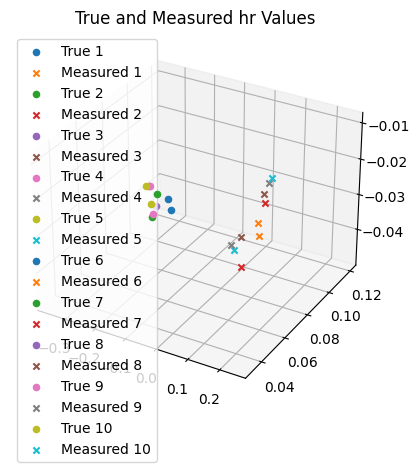

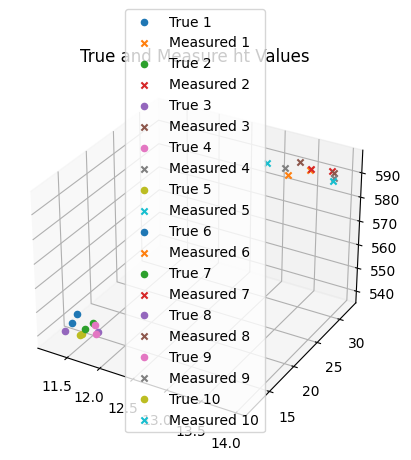

In [8]:
import sys
sys.path.append("./FaceAlignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


hr = hr.reshape((10,3))
ht = ht.reshape((10,3))

# 计算每组数据的均方根误差（RMSE）
rmse_hr = [np.sqrt(np.mean((true - measured)**2)) for true, measured in zip(hr, hr_xgaze)]
rmse_ht = [np.sqrt(np.mean((true - measured)**2)) for true, measured in zip(ht, ht_xgaze)]

# 可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for i in range(10):
    ax.scatter(hr_xgaze[i, 0], hr_xgaze[i, 1], hr_xgaze[i, 2], marker='o', label=f'True {i+1}')
    ax.scatter(hr[i, 0], hr[i, 1], hr[i, 2], marker='x', label=f'Measured {i+1}')

plt.title('True and Measured hr Values')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for i in range(10):
    ax.scatter(ht_xgaze[i, 0], ht_xgaze[i, 1], ht_xgaze[i, 2], marker='o', label=f'True {i+1}')
    ax.scatter(ht[i, 0], ht[i, 1], ht[i, 2], marker='x', label=f'Measured {i+1}')

plt.title('True and Measure ht Values')
plt.legend()
plt.show()


In [9]:
for htg, htgt in zip(hr_xgaze, hr):
    print(htg,htgt)
    # print(htg/np.linalg.norm(htg), htgt/np.linalg.norm(htgt))
    # print('---------')


[-0.32728604  0.11937479 -0.04772198] [ 0.21012673  0.05483422 -0.0223102 ]
[-0.33418889  0.10504104 -0.04559024] [ 0.23687834  0.03303486 -0.02336791]
[-0.34237717  0.11019345 -0.04423506] [ 0.19111258  0.0455592  -0.02043316]
[-0.3321213   0.10546428 -0.04486244] [ 0.19044665  0.03788902 -0.02029213]
[-0.34913504  0.10777821 -0.04296927] [ 0.19449154  0.03933335 -0.02197497]
[-0.33084122  0.11813755 -0.04409446] [ 0.20222037  0.05627327 -0.01955588]
[-0.33644258  0.10964916 -0.04009804] [ 0.197283    0.06300644 -0.01624654]
[-0.34041968  0.10451484 -0.03657402] [ 0.19851859  0.0620706  -0.01350101]
[-0.33968579  0.10453319 -0.03654704] [ 0.20722634  0.06359894 -0.01095864]
[-0.34544795  0.10322833 -0.03635818] [ 0.2115151   0.06480452 -0.00990962]


# 使用xgaze方式预测注视向量

In [10]:
from model import gaze_network
from torchvision import transforms

# 模型读取
trans = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),  # this also convert pixel value from [0,255] to [0,1]
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
model = gaze_network()
model.cuda()
pre_trained_model_path = './ckpt/epoch_24_ckpt.pth.tar'
ckpt = torch.load(pre_trained_model_path)
model.load_state_dict(ckpt['model_state'], strict=True)
model.eval()

# 数据预处理
cap = cv2.VideoCapture(video_path)
pred_norm = []
pred = []
idx = 0
while idx != 10:
    ret,image = cap.read()
    hr, ht, Ear = warp_norm.xnorm(image, camera_matrix)
    if(hr.all() == 0 and ht.all() == 0):
        warp_image = np.zeros((224,224,3), dtype=np.byte)
        gcn = np.zeros((3,1))
        R = np.zeros((3,3))
    face_model_load = np.loadtxt('./modules/face_model.txt')  # Generic face model with 3D facial landmarks
    landmark_use = [20, 23, 26, 29, 15, 19]  # we use eye corners and nose conners
    face_model = face_model_load[landmark_use, :]
    warp_image,_,gcn,R = warp_norm.xtrans(image, face_model, hr, ht, camera_matrix, pixel_scale,gc = np.array([100,100,0]))

    # 模型推理
    input_var = warp_image[:, :, [2, 1, 0]]  # from BGR to RGB
    input_var = trans(input_var)
    input_var = torch.autograd.Variable(input_var.float().cuda())
    input_var = input_var.view(1, input_var.size(0), input_var.size(1), input_var.size(2))  # the input must be 4-dimension
    pred_gaze = model(input_var)  # get the output gaze direction, this is 2D output as pitch and raw rotation
    pred_gaze = pred_gaze[0] # here we assume there is only one face inside the image, then the first one is the prediction
    pred_gaze_np = pred_gaze.cpu().data.numpy()  # convert the pytorch tensor to numpy array
    print('Predict normalization gaze vector(pitch yaw):', pred_gaze_np)
    pred_norm.append(pred_gaze_np)
    pred.append(np.dot(np.linalg.inv(R),warp_norm.pitchyaw_to_vector(np.array([pred_gaze_np])).T))
    print('Ground truth gaze vector:', gazen[0])

    idx += 1

detected one face
max face position: [(718, 376) (1103, 761)]
Predict normalization gaze vector(pitch yaw): [-0.49789906  0.0346749 ]
Ground truth gaze vector: [-0.34259087 -0.00121984]
detected one face
max face position: [(776, 420) (1097, 741)]
Predict normalization gaze vector(pitch yaw): [-0.47059175  0.03057084]
Ground truth gaze vector: [-0.34259087 -0.00121984]
detected one face
max face position: [(776, 420) (1097, 741)]
Predict normalization gaze vector(pitch yaw): [-0.4781286   0.04092645]
Ground truth gaze vector: [-0.34259087 -0.00121984]
detected one face
max face position: [(776, 420) (1097, 741)]
Predict normalization gaze vector(pitch yaw): [-0.46462366  0.03852735]
Ground truth gaze vector: [-0.34259087 -0.00121984]
detected one face
max face position: [(776, 420) (1097, 741)]
Predict normalization gaze vector(pitch yaw): [-0.466282    0.03250267]
Ground truth gaze vector: [-0.34259087 -0.00121984]
detected one face
max face position: [(776, 420) (1097, 741)]
Predict 

[[-0.49789906  0.0346749 ]
 [-0.47059175  0.03057084]
 [-0.4781286   0.04092645]
 [-0.46462366  0.03852735]
 [-0.466282    0.03250267]
 [-0.4693837   0.01967713]
 [-0.48873568  0.02102608]
 [-0.47111806  0.0156734 ]
 [-0.48009074  0.03028149]
 [-0.48814887  0.0305824 ]]
[[-0.34259087 -0.00121984]
 [-0.34158853 -0.00149118]
 [-0.33979234 -0.00302875]
 [-0.33949664 -0.0026004 ]
 [-0.34026277 -0.00201097]
 [-0.34130844 -0.00391515]
 [-0.33914542 -0.00559433]
 [-0.33779857 -0.00635765]
 [-0.33823243 -0.00810874]
 [-0.3385933  -0.00812625]]


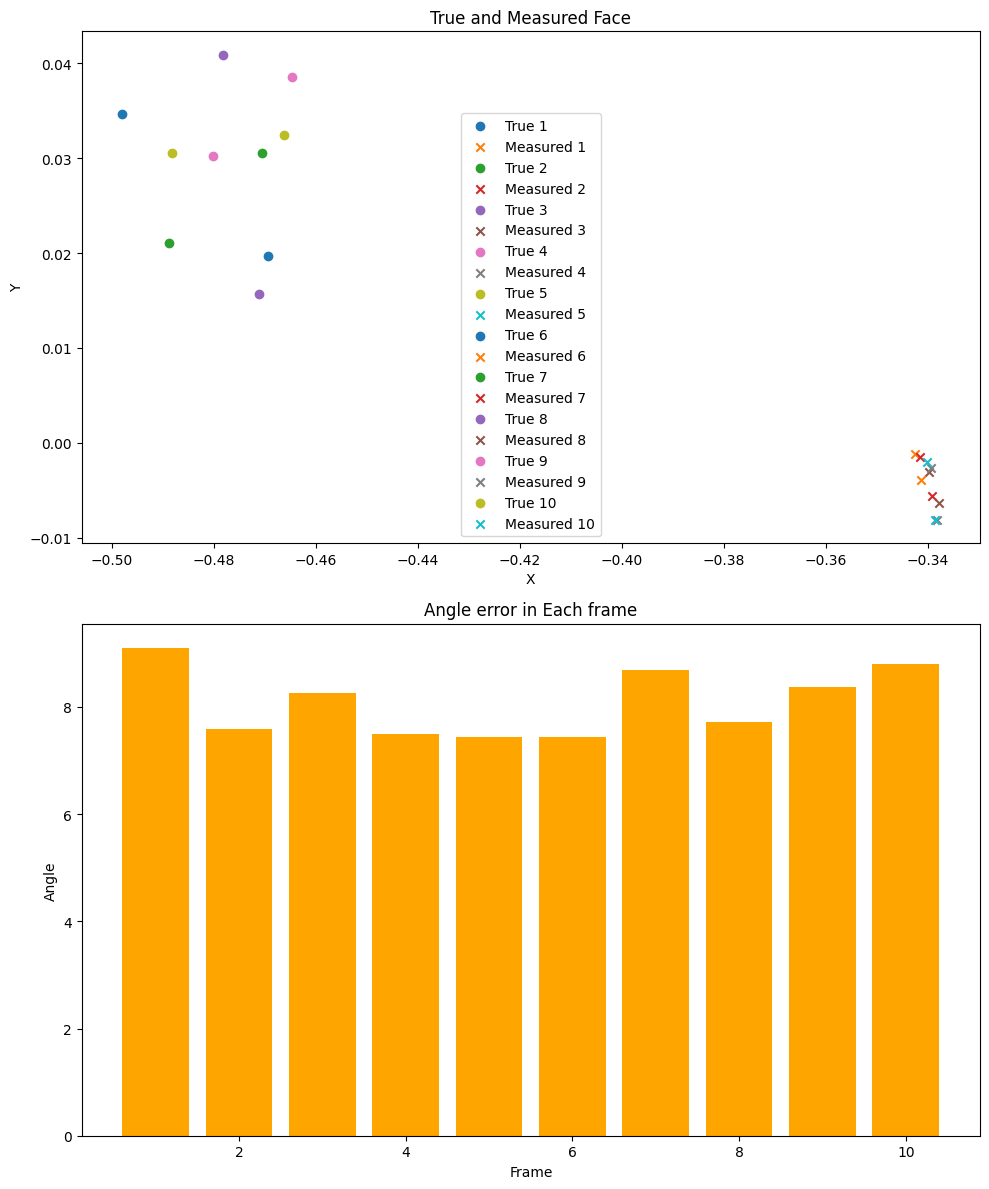

8.089672145644647


In [11]:
pred_norm = np.array(pred_norm)
print(pred_norm)
label_norm = gazen[0:10]
print(label_norm)
# 计算角度误差
e_norm = warp_norm.angular_error(pred_norm,label_norm)
# 可视化
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for i in range(10):
    plt.scatter(pred_norm[i, 0], pred_norm[i, 1], marker='o', label=f'True {i+1}')
    plt.scatter(label_norm[i, 0], label_norm[i, 1], marker='x', label=f'Measured {i+1}')

plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(range(1, 10+1), e_norm, color='orange')
plt.title('Angle error in Each frame')
plt.xlabel('Frame')
plt.ylabel('Angle')

plt.tight_layout()
plt.show()
print(np.mean(e_norm))

In [12]:
pred = warp_norm.vector_to_pitchyaw(np.array(pred).reshape((10,3)))
print(pred)

[[-0.48891644  0.02383608]
 [-0.46154788  0.02385945]
 [-0.47018854  0.03347302]
 [-0.45677549  0.03268703]
 [-0.45819904  0.02702132]
 [-0.46083356  0.01318125]
 [-0.48074509  0.01565488]
 [-0.46279486  0.01382162]
 [-0.47322336  0.0277517 ]
 [-0.48129262  0.02723057]]


In [13]:
eve_R = file['face_R']['data']
label = []

for i in range(10):
    label.append(np.dot(np.linalg.inv(eve_R[i]),warp_norm.pitchyaw_to_vector(label_norm)[i].T))
label = np.array(label)
label = warp_norm.vector_to_pitchyaw(label)
print(label)

[[-0.31912163  0.01736544]
 [-0.3182969   0.01544314]
 [-0.31643268  0.01569364]
 [-0.31658697  0.0157093 ]
 [-0.31773827  0.01576329]
 [-0.31913841  0.01544342]
 [-0.31696497  0.01575719]
 [-0.3156993   0.01580999]
 [-0.31611865  0.01501876]
 [-0.31681485  0.01520067]]


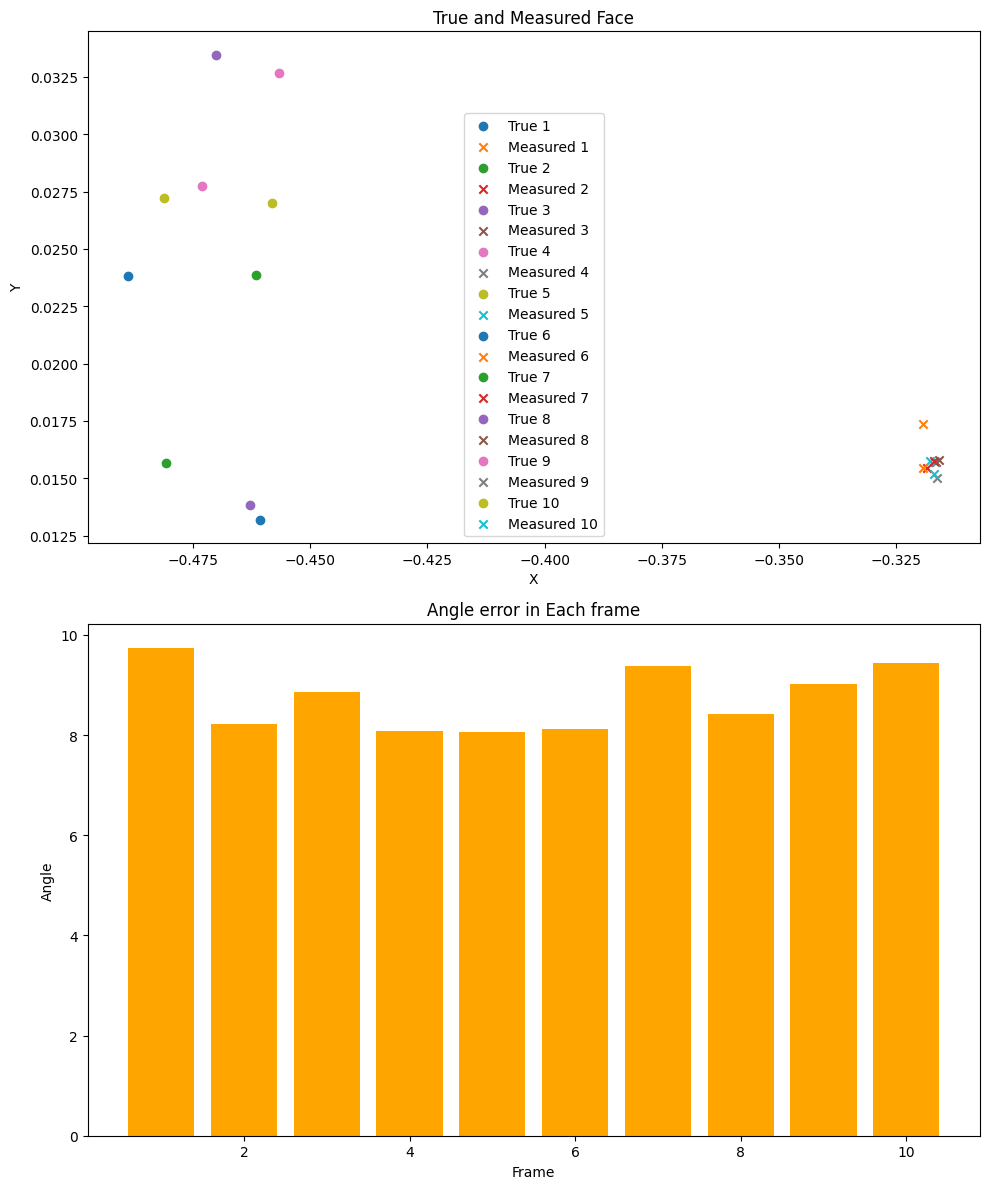

8.736971648344106


In [14]:
# 计算角度误差
e = warp_norm.angular_error(pred,label)
# 可视化
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for i in range(10):
    plt.scatter(pred[i, 0], pred[i, 1], marker='o', label=f'True {i+1}')
    plt.scatter(label[i, 0], label[i, 1], marker='x', label=f'Measured {i+1}')

plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(range(1, 10+1), e, color='orange')
plt.title('Angle error in Each frame')
plt.xlabel('Frame')
plt.ylabel('Angle')

plt.tight_layout()
plt.show()
print(np.mean(e))

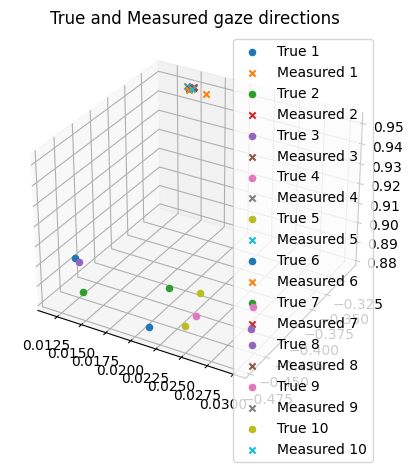

In [15]:
pred = warp_norm.pitchyaw_to_vector(pred)
label = warp_norm.pitchyaw_to_vector(label)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for i in range(10):
    ax.scatter(pred[i, 0], pred[i, 1], pred[i, 2], marker='o', label=f'True {i+1}')
    ax.scatter(label[i, 0], label[i, 1], label[i, 2], marker='x', label=f'Measured {i+1}')

plt.title('True and Measured gaze directions')
plt.legend()
plt.show()

In [16]:
pred_gc = []
for i in range(10):
    pred_gc.append(warp_norm.vector_to_gc(pred[i], pixel_scale))
pred_gc = np.array(pred_gc)

[[  49.66431888 1108.78479103]
 [  49.71302748 1036.63262844]
 [  69.7564769  1059.48611729]
 [  68.11732419 1024.51042708]
 [  56.30405325 1028.0235024 ]
 [  27.4605508  1034.57155402]
 [  32.61463969 1086.85258432]
 [  28.79479934 1039.67987277]
 [  57.8266993  1067.27237856]
 [  56.74027354 1088.57455901]]
[[958.9517  555.60803]
 [956.2393  553.57135]
 [955.60895 552.43976]
 [955.9632  551.06665]
 [956.13983 551.30133]
 [955.65967 551.11163]
 [954.93994 550.79193]
 [955.24384 550.82446]
 [953.9919  548.0579 ]
 [954.9241  548.3851 ]]


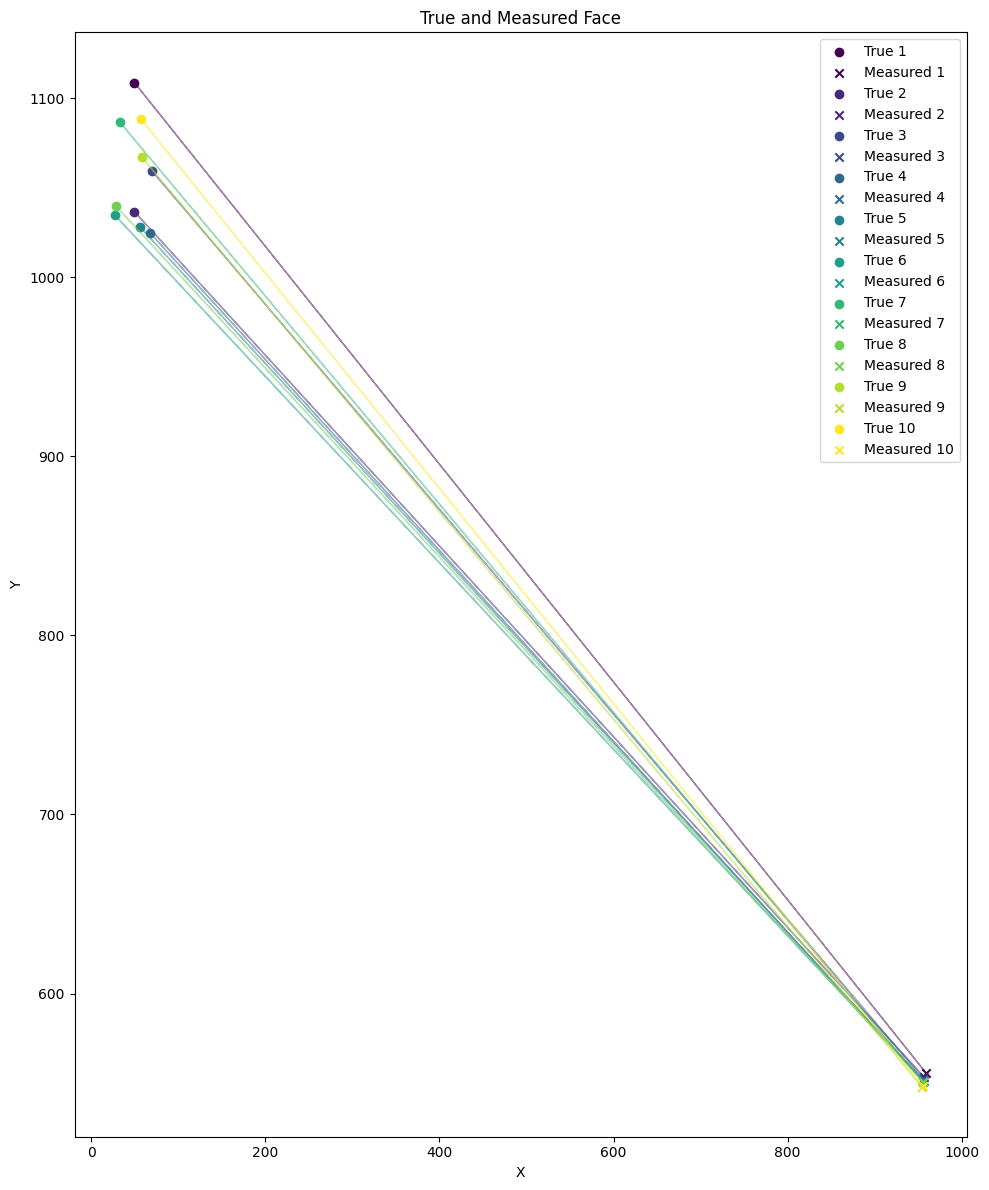

In [17]:
print(pred_gc)
print(tobii[0:10])
# 可视化
plt.figure(figsize=(10, 12))

colors = plt.cm.viridis(np.linspace(0, 1, 10))

for i in range(10):
    plt.scatter(pred_gc[i, 0], pred_gc[i, 1], marker='o',color = colors[i], label=f'True {i+1}')
    plt.scatter(tobii[i, 0], tobii[i, 1], marker='x',color = colors[i], label=f'Measured {i+1}')
    plt.arrow(tobii[i, 0], tobii[i, 1], pred_gc[i, 0] - tobii[i, 0], pred_gc[i, 1] - tobii[i, 1], color=colors[i], alpha=0.5)

plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


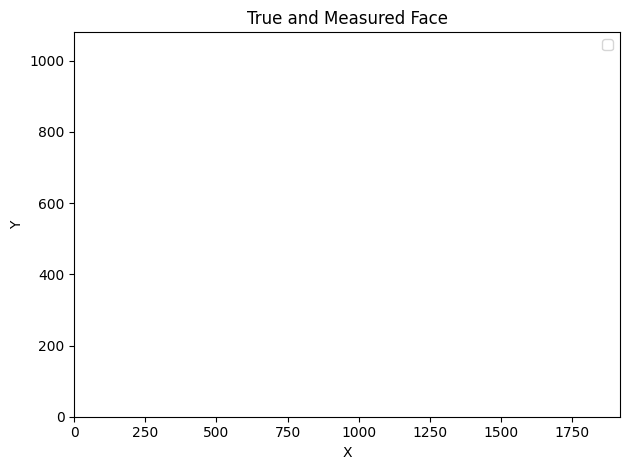

In [18]:
org = tobii[0] - pred_gc[0]
pred_gc_org = org + pred_gc
# 可视化



plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(0, 1920)
plt.ylim(0, 1080)
plt.tight_layout()
plt.show()


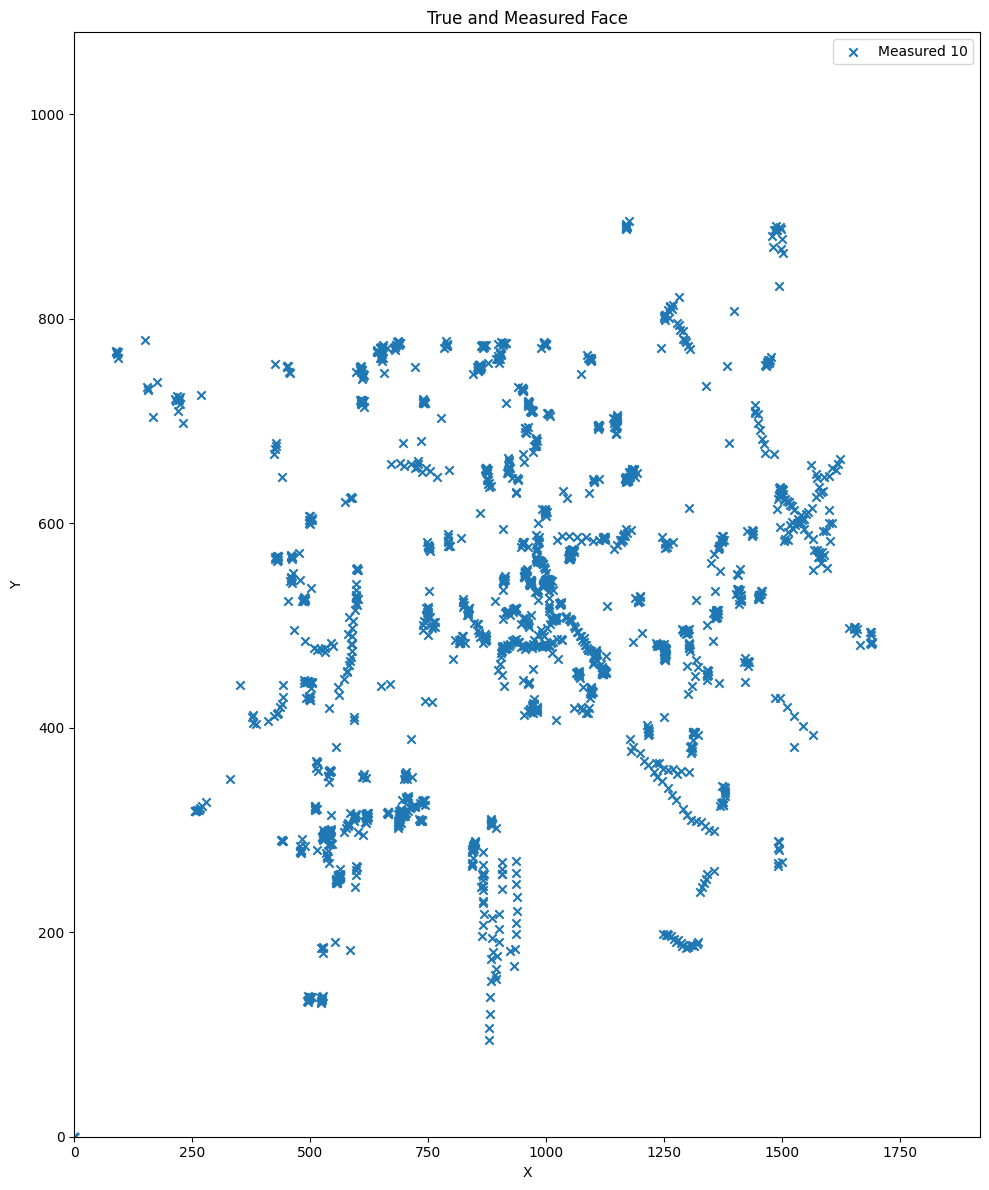

In [19]:
plt.figure(figsize=(10, 12))

colors = plt.cm.viridis(np.linspace(0, 1, 10))

plt.scatter(tobii[:, 0], tobii[:, 1], marker='x', label=f'Measured {i+1}')
plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(0, 1920)
plt.ylim(0, 1080)
plt.tight_layout()
plt.show()

# 对整个subject进行处理

## 读取已经处理好的pkl

In [38]:
import h5py
import cv2
import warp_norm
import matplotlib
import sys
sys.path.append("./FaceAlignment")
import face_alignment
from skimage import io
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from model import gaze_network
from torchvision import transforms
import pickle


with open('./eve_val01_pred_c.pkl', 'rb') as fo:
    tinydict = pickle.load(fo, encoding='bytes')

In [39]:
pred_norm = tinydict['pred_norm']
print(gazen.shape)
label_norm = gazen[0:3600]
# print(label_norm)
# e_norm = warp_norm.angular_error(pred_norm,label_norm)
# print(np.mean(e_norm))

(1800, 2)


In [40]:
pred = tinydict['pred']
pred = warp_norm.vector_to_pitchyaw(np.array(pred).reshape((-1,3)))
eve_R = file['face_R']['data']
label = []

for i in range(1800):
    label.append(np.dot(np.linalg.inv(eve_R[i]),warp_norm.pitchyaw_to_vector(label_norm)[i].T))
label = np.array(label)
label = warp_norm.vector_to_pitchyaw(label)
print(label.shape)
# e = warp_norm.angular_error(pred,label)
# print(np.mean(e))

(1800, 2)


## 对pog进行研究

[[  49.62148026 1108.79081025]
 [  49.68074181 1036.72277112]
 [  69.71998311 1059.75875194]
 ...
 [-143.74582879 1341.37075327]
 [-284.30735114 1172.03147241]
 [-387.20719197 1123.96957199]]
[[958.9517  555.60803]
 [956.2393  553.57135]
 [955.60895 552.43976]
 ...
 [668.441   442.63687]
 [592.4888  407.43842]
 [592.8441  410.59778]]


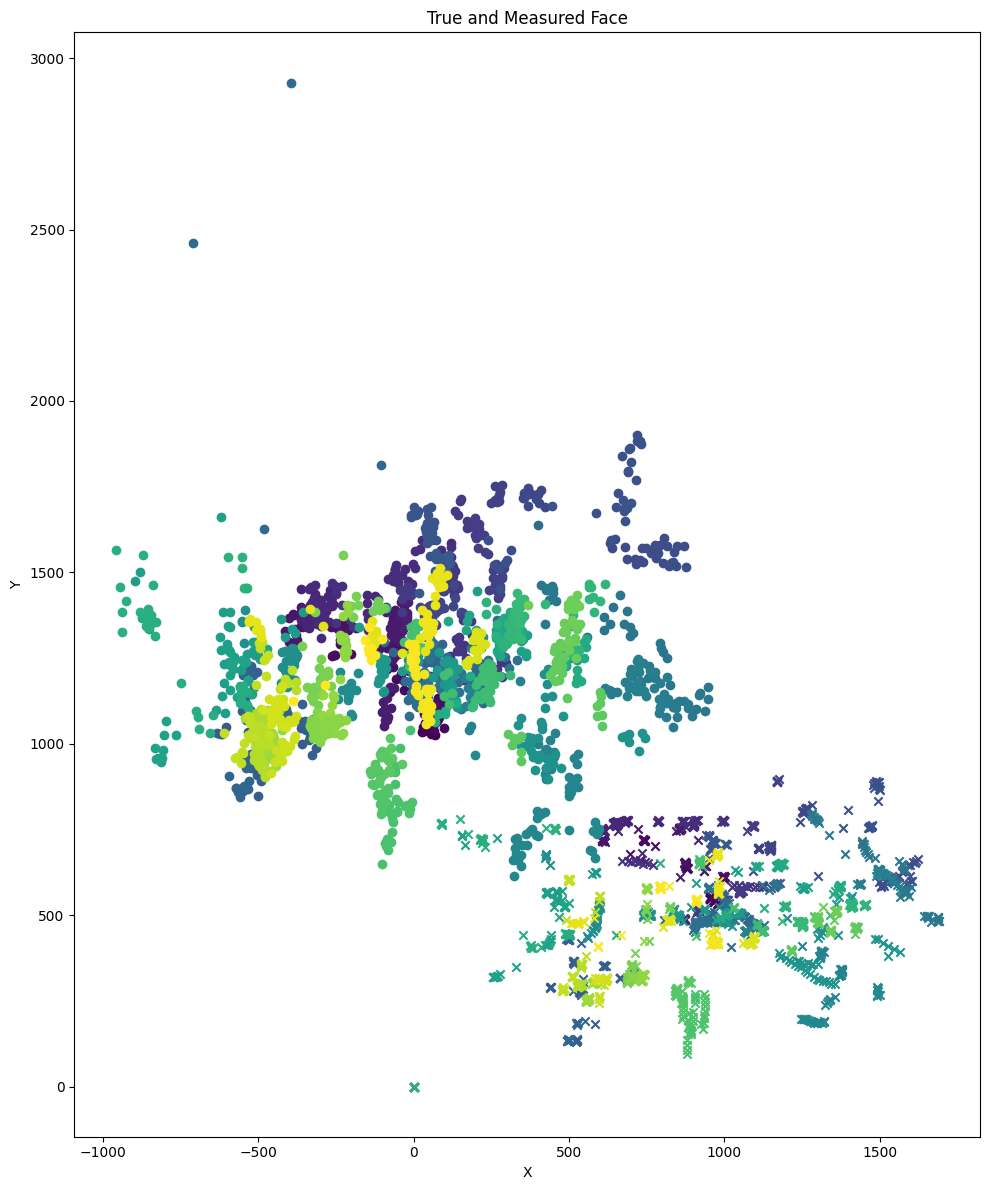

In [41]:
pred_gc = []
pred = warp_norm.pitchyaw_to_vector(pred)
for i in range(pred.shape[0]):
    ## error
    pred_gc.append(warp_norm.vector_to_gc(pred[i], pixel_scale))
pred_gc = np.array(pred_gc)
print(pred_gc)
print(tobii[0:1800])
# 可视化
plt.figure(figsize=(10, 12))

colors = plt.cm.viridis(np.linspace(0, 1, 1800))

for i in range(1800):
    plt.scatter(pred_gc[i, 0], pred_gc[i, 1], marker='o',color = colors[i], label=f'Measured{i+1}')
    plt.scatter(tobii[i, 0], tobii[i, 1], marker='x',color = colors[i], label=f'True{i+1}')
    #plt.arrow(tobii[i, 0], tobii[i, 1], pred_gc[i, 0] - tobii[i, 0], pred_gc[i, 1] - tobii[i, 1], color=colors[i], alpha=0.5)

plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend()

plt.tight_layout()
plt.show()

[ 909.33024093 -553.18277802]


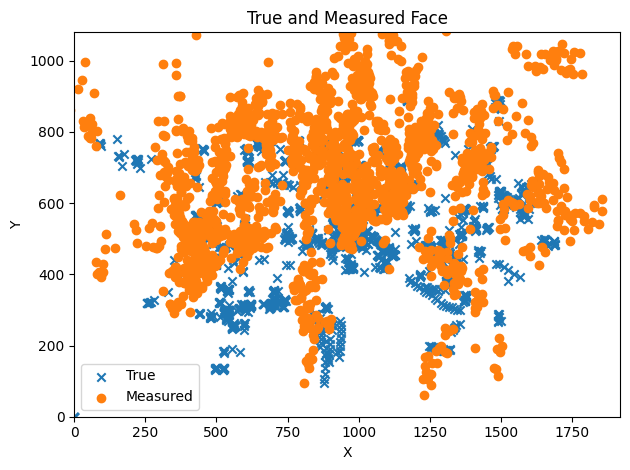

In [42]:
org = tobii[0] - pred_gc[0]
pred_gc_org = org + pred_gc
print(org)

plt.scatter(tobii[0:3600, 0], tobii[0:3600, 1], marker='x', label=f'True')
plt.scatter(pred_gc_org[:, 0], pred_gc_org[:, 1], marker='o', label=f'Measured')
plt.title('True and Measured Face')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(0, 1920)
plt.ylim(0, 1080)
plt.tight_layout()
plt.show()


## 寻找特殊点
结论：tobii获取的特殊点似乎并没有反馈到视频的注视点标注上，似乎只是单纯的错误。

In [ ]:
for i in range(3600):
    if tobii[i,0] < 100 and tobii[i,1] < 100:
        print(i)

665
956
957
995
1232
1233
1234
1235
1236
1237
1238
1239
1703
1786
1970
2277
2305


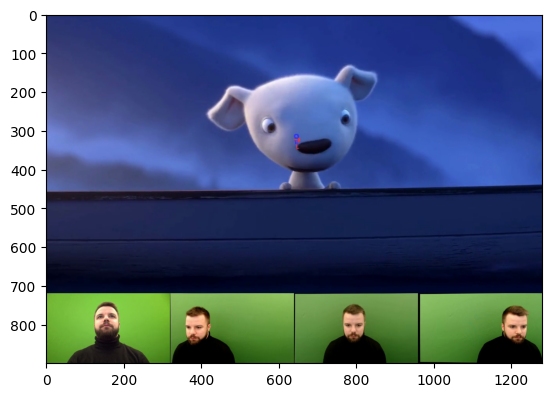

In [ ]:
cap = cv2.VideoCapture('/home/hgh/hghData/gaze/eve/valpart/val01/step030_video_Wikimedia-Joy-and-Heron-Animated-CGI-Spot-by-Passion-Pictures.mp4')
idx = 1
hr_xgaze = []
ht_xgaze = []
while True:
    ret,frame = cap.read()
    if idx == 666:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        break
    idx = idx+1
plt.show()